In [2]:
### This is a vignette on how to use watermelon barcodes with singletCode

In [3]:
# Installing singletCode Command line tool (and other packages)

#!git clone https://github.com/GoyalLab/singletCodeTools
%conda install scipy tqdm matplotlib biopython python-levenshtein pandas

In [23]:
#Creating sample sheet for these two samples.¶

import pandas as pd

Path = "path/to/singletCodeTools/repo"
p = "path/to/downloaded/and/unzipped/data"

sampleSheet = pd.read_csv(f"{p}/inputFiles/sampleSheet.csv")
sampleSheet

,sampleName,sampleNumber
0,sampleName,1
1,otherSampleName,2


In [24]:
# Running watermelon module

import subprocess

command = [
    'python',
    f'{Path}/commandLine/singletCodeCommandLine.py',
    
    'watermelon',
    '-i',  f'{p}/inputFiles',
    '-o',  f'{p}/outputFiles',
    '-s', f'{p}/inputFiles/sampleSheet.csv',
    '--outputName', 'watermelonBarcodeUmi.csv'
]

result = subprocess.run(command)

Arguments received:
  command: watermelon
  inputFolder: /Volumes/fsmresfiles/Basic_Sciences/CDB/GoyalLab/People/KeerthanaArun/websiteUpdateSingletCode/watermelonVignetteData/inputFiles
  outputFolder: /Volumes/fsmresfiles/Basic_Sciences/CDB/GoyalLab/People/KeerthanaArun/websiteUpdateSingletCode/watermelonVignetteData/outputFiles
  sampleSheet: /Volumes/fsmresfiles/Basic_Sciences/CDB/GoyalLab/People/KeerthanaArun/websiteUpdateSingletCode/watermelonVignetteData/inputFiles/sampleSheet.csv
  outputName: watermelonBarcodeUmi.csv
  use10X: False
  input10X: None
All the inputs for the command are valid and will proceed with creating the barcode sheet for all the samples in the sheet.
Filtered rows of dataframe: 940
Filtered rows of dataframe: 718


In [25]:
# using 10X cell IDs as an additional level of check
import subprocess

result = subprocess.run([
    'python',
    f'{Path}/commandLine/singletCodeCommandLine.py',
    'watermelon',
    '-i', f'{p}/inputFiles/',
    '-o', f'{p}/outputFiles/',
    '-s', f'{p}/inputFiles/sampleSheet.csv',
    '--outputName', 'watermelonBarcodeUmiWith10X.csv',
    '--use10X',
    '--input10X', f'{p}/inputFiles/barcodes.tsv'
], capture_output=True, text=True)

# Check if the command was successful
if result.returncode == 0:
    print("Command executed successfully")
    print("Output:\n", result.stdout)
else:
    print("Command failed")
    print("Error:\n", result.stderr)

Command executed successfully
Output:
 Arguments received:
  command: watermelon
  inputFolder: /Volumes/fsmresfiles/Basic_Sciences/CDB/GoyalLab/People/KeerthanaArun/websiteUpdateSingletCode/watermelonVignetteData/inputFiles/
  outputFolder: /Volumes/fsmresfiles/Basic_Sciences/CDB/GoyalLab/People/KeerthanaArun/websiteUpdateSingletCode/watermelonVignetteData/outputFiles/
  sampleSheet: /Volumes/fsmresfiles/Basic_Sciences/CDB/GoyalLab/People/KeerthanaArun/websiteUpdateSingletCode/watermelonVignetteData/inputFiles/sampleSheet.csv
  outputName: watermelonBarcodeUmiWith10X.csv
  use10X: True
  input10X: /Volumes/fsmresfiles/Basic_Sciences/CDB/GoyalLab/People/KeerthanaArun/websiteUpdateSingletCode/watermelonVignetteData/inputFiles/barcodes.tsv
All the inputs for the command are valid and will proceed with creating the barcode sheet for all the samples in the sheet.
Filtered rows of dataframe: 791
Filtered rows of dataframe: 629



In [26]:
#singletCode module to identify true singlets from 10X checked data

result = subprocess.run([
    'python',
    f'{Path}/commandLine/singletCodeCommandLine.py',
    'count',
    '-i', f'{p}/outputFiles/watermelonBarcodeUmiWith10X.csv',
    '-o', f'{p}/outputFiles/watermelon'
], capture_output=True, text=True)

# Check if the command was successful
if result.returncode == 0:
    print("Command executed successfully")
    print("Output:\n", result.stdout)
else:
    print("Command failed")
    print("Error:\n", result.stderr)

Command executed successfully
Output:
 Arguments received:
  command: count
  input_file: /Volumes/fsmresfiles/Basic_Sciences/CDB/GoyalLab/People/KeerthanaArun/websiteUpdateSingletCode/watermelonVignetteData/outputFiles/watermelonBarcodeUmiWith10X.csv
  out_prefix: /Volumes/fsmresfiles/Basic_Sciences/CDB/GoyalLab/People/KeerthanaArun/websiteUpdateSingletCode/watermelonVignetteData/outputFiles/watermelon
  umi_cutoff_ratio: 7.5e-06
  umi_diff_threshold: 50
  dominant_threshold: 10
  min_umi_good_data_cutoff: 2
INFO: Raw data counts
sampleNum
sampleName         693
otherSampleName    524
Name: count, dtype: int64
INFO: Using raio based filtering.
Current Sample Adjusted UMI cutoff: 2
Total cells: 45
Sample sampleName singlet: 43
Total Singlets: 43
Total Multiplets: 1
All singlets identified are unique? True
Total Singlets: 43
Total Multiplets: 1
INFO: Using raio based filtering.
Current Sample Adjusted UMI cutoff: 2
Total cells: 22
Sample otherSampleName singlet: 22
Total Singlets: 22
To

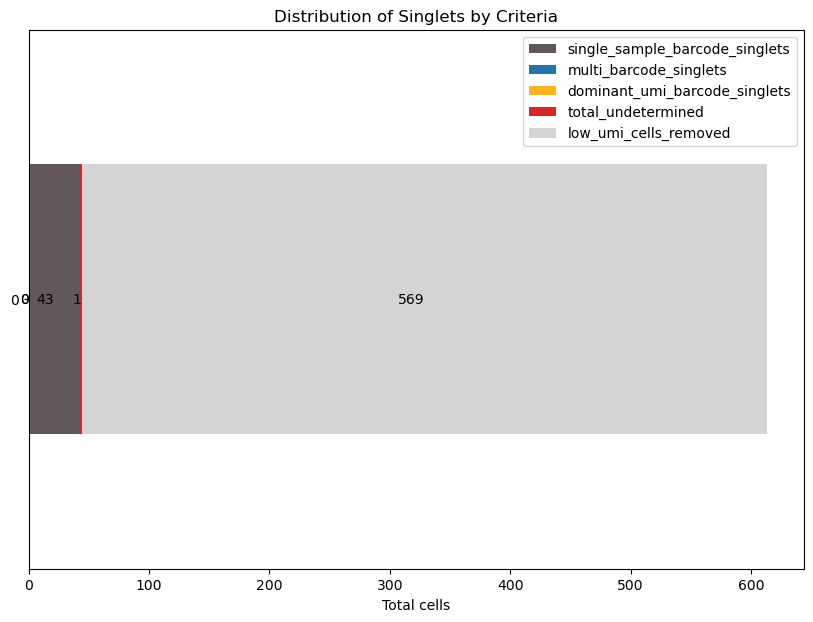

In [27]:
#Visualising singletCode output by plotting the distribution of low UMI cells, different kinds of singlets, and undetermined cells for sample sampleName
import matplotlib.pyplot as plt

stats = pd.read_csv(f"{p}/outputFiles/watermelon_sampleName_singlets_stats.csv")
colors = ['#62575b', '#2175a8', '#feb422', '#d62728', '#d4d4d4']  # Example colors, modify as needed
plotData = stats.drop(columns = ['dataset', 'total_cells', "total_singlets"])

# Plotting
ax = plotData.plot(kind='barh', stacked=True, figsize=(10, 7), color=colors)

for plot in ax.patches:
    ax.annotate(f'{int(plot.get_width())}', (plot.get_x() + plot.get_width()/2, plot.get_y() + plot.get_height()/2), ha='right', va='center')

ax.set_xlabel('Total cells')
ax.set_title('Distribution of Singlets by Criteria')
plt.show()


In the above plot, there are 569 cells that were removed due to low barcode UMI count, 43 singlets with a single barcode associated with them and 1 multiplet (singletCode could not determine if it was a singlet).

In [ ]:
#Install scanpy for further single-cell RNAseq analysis
%conda install -c conda-forge scanpy python-igraph leidenalg 
#Import scanpy
import scanpy as sc

**NOTE** \
If there are conflicts or you are not able to import scanpy due to version conflicts, we found *%conda update --all* to be an useful command that fixed the conflict previously.

In [19]:
#Reading in the 10X h5ad object associated with the same watermelon data
adata = sc.read_h5ad(f"{p}/inputFiles/watermelonScRnaSeqData.h5ad")
adata

AnnData object with n_obs × n_vars = 1093 × 27264

In [28]:
#Read in the input/output files from singletCode to identify low UMI cells, different types of singlets and multiplets
cellidBarcodeUMI = pd.read_csv(f"{p}/outputFiles/watermelonBarcodeUmiWith10X.csv")

In [29]:
#Reading in all the singlets and multiplets idenified in the two samples
sampleNameSinglets = pd.read_csv(f"{p}/outputFiles/watermelon_sampleName_singlets_all.txt", header = None)
otherSampleNameSinglets = pd.read_csv(f"{p}/outputFiles/watermelon_otherSampleName_singlets_all.txt", header = None)

#There might not always be multiplets - check the stats file to see if there are any. In this example, there are no multiplets in otherSampleName
sampleNameMultiplets = pd.read_csv(f"{p}/outputFiles/watermelon_sampleName_multiplets.txt", header = None)

In [30]:
#Creating a list to annotate all cells in the scRNAseq object into low barcode UMI count, singlet or multiplet
lowUmiCells = cellidBarcodeUMI[~(cellidBarcodeUMI['cellID'].isin(sampleNameSinglets[0]) | 
                                 cellidBarcodeUMI['cellID'].isin(otherSampleNameSinglets[0]) | 
                                 cellidBarcodeUMI['cellID'].isin(sampleNameMultiplets[0]))]



In [31]:
#Annotating the adata with these labels using the lists created
adata.obs.loc[adata.obs.index.isin(sampleNameSinglets[0]), 'singletStatus'] = 'singlet'
adata.obs.loc[adata.obs.index.isin(otherSampleNameSinglets[0]), 'singletStatus'] = 'singlet'
adata.obs.loc[adata.obs.index.isin(sampleNameMultiplets[0]), 'singletStatus'] = 'multiplet'
adata.obs.loc[adata.obs.index.isin(lowUmiCells['cellID']), 'singletStatus'] = 'low UMI'

In [32]:
# Note that in this vignette we are not doing any actual QC - but in actual analysis, it would need to be done.
sc.pp.calculate_qc_metrics(adata, inplace=True)

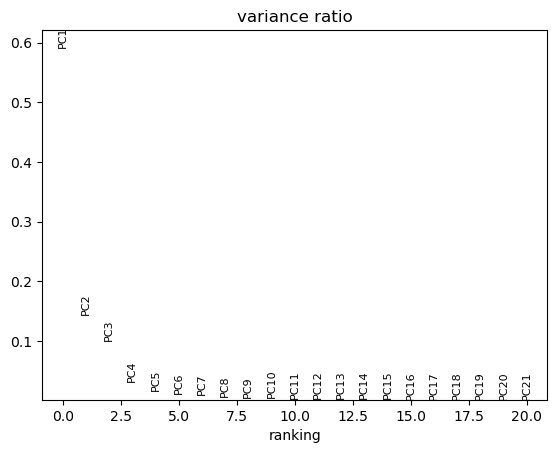

In [33]:
#Calculating PCA for the data and plotting variance ratio
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=20)

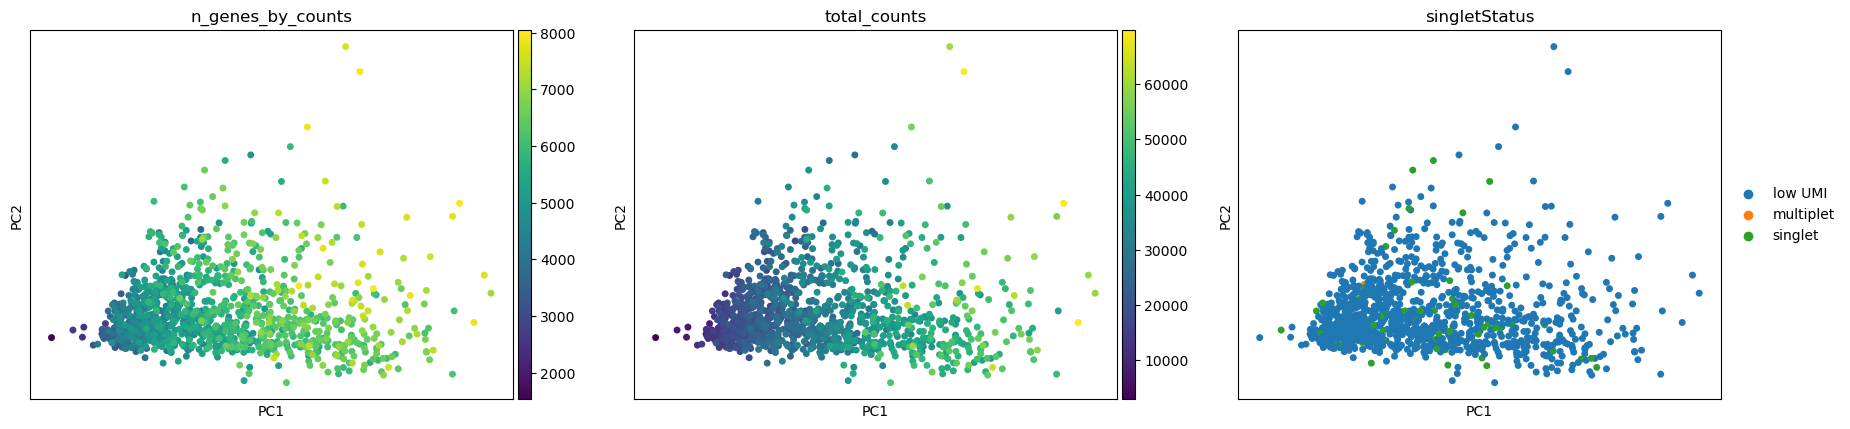

In [34]:
sc.pl.pca(
    adata,
    color = ['n_genes_by_counts', 'total_counts', 'singletStatus'],
    size = 100,
)

In [35]:
#Calculating neighbours and UMAP from that for further visualization
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/mzo5929/miniforge3/envs/websiteFinalTest/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


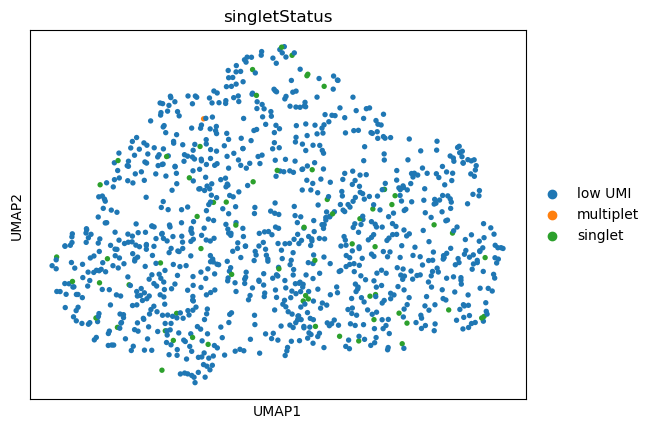

In [36]:
sc.pl.umap(
    adata,
    color=['singletStatus'],
    size=60,
)

In [37]:
#Saving the adata with all the calculated data
adata.write(f"{p}/outputFiles/watermelonScRNA.h5ad")